In [1]:
import torch.nn.functional as F
import torch
from torch import nn
from dataset import load_dataset
from training_loop import train_model
from basic_unet import UNet
from torch import optim
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import matplotlib.patches as mpatches
import numpy as np

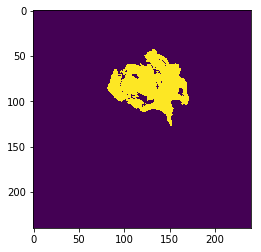

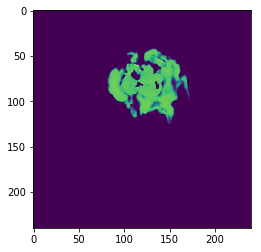

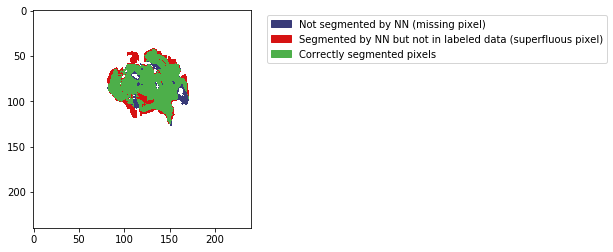

In [2]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

train_loader, test_loader = load_dataset(1)

model = UNet(in_channels=4, out_channels=1)
state_dict = torch.load('models/3_basic_unet_flat_criterion_279_0.00000.pth')
model.load_state_dict(state_dict)
model = model.to(device)

COLOR_LABEL = '#393B79' # 1 = blue, only on label segment
COLOR_NETWORK = '#d61313' # 2 = red, only on network output
COLOR_BOTH = '#4DAF4A' # 3 = green, on both segments

cmap = ListedColormap(colors=[
    (1.0, 1.0, 1.0),
    COLOR_LABEL,
    COLOR_NETWORK,
    COLOR_BOTH,
])

for sample in test_loader:
    segment = sample['segment']
    segment = segment.squeeze()
    plt.imshow(segment)
    plt.show()

    image = sample['input'].to(device)
    output = model(image)
    output = output.detach().cpu().squeeze().numpy()
    plt.imshow(output)
    plt.show()
    
    output_threshold = (output > output.mean()).astype(int)
    segment_threshold = (segment.numpy() > 0).astype(int)

    plt.imshow(output_threshold * 2 + segment_threshold, cmap=cmap)
    label_patch = mpatches.Patch(color=COLOR_LABEL, label='Not segmented by NN (missing pixel)')
    network_patch = mpatches.Patch(color=COLOR_NETWORK, label='Segmented by NN but not in labeled data (superfluous pixel)')
    both_patch = mpatches.Patch(color=COLOR_BOTH, label='Correctly segmented pixels')
    plt.legend(handles=[label_patch, network_patch, both_patch], loc=2, bbox_to_anchor=(1.05, 1))
    plt.show()
    break